In [1]:

from concurrent import futures
import time
import random
from concurrent.futures import ProcessPoolExecutor
import os
import pandas as pd
from decimal import Decimal
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import numpy as np
from math import *
from numpy.linalg import *
import math
import os

# import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
from RFRHelper import RandomForestInterpolation3D
from concurrent.futures import ProcessPoolExecutor, wait, as_completed
import time
from datetime import datetime
from tqdm import tqdm
from io import StringIO
import matplotlib.pyplot as plt


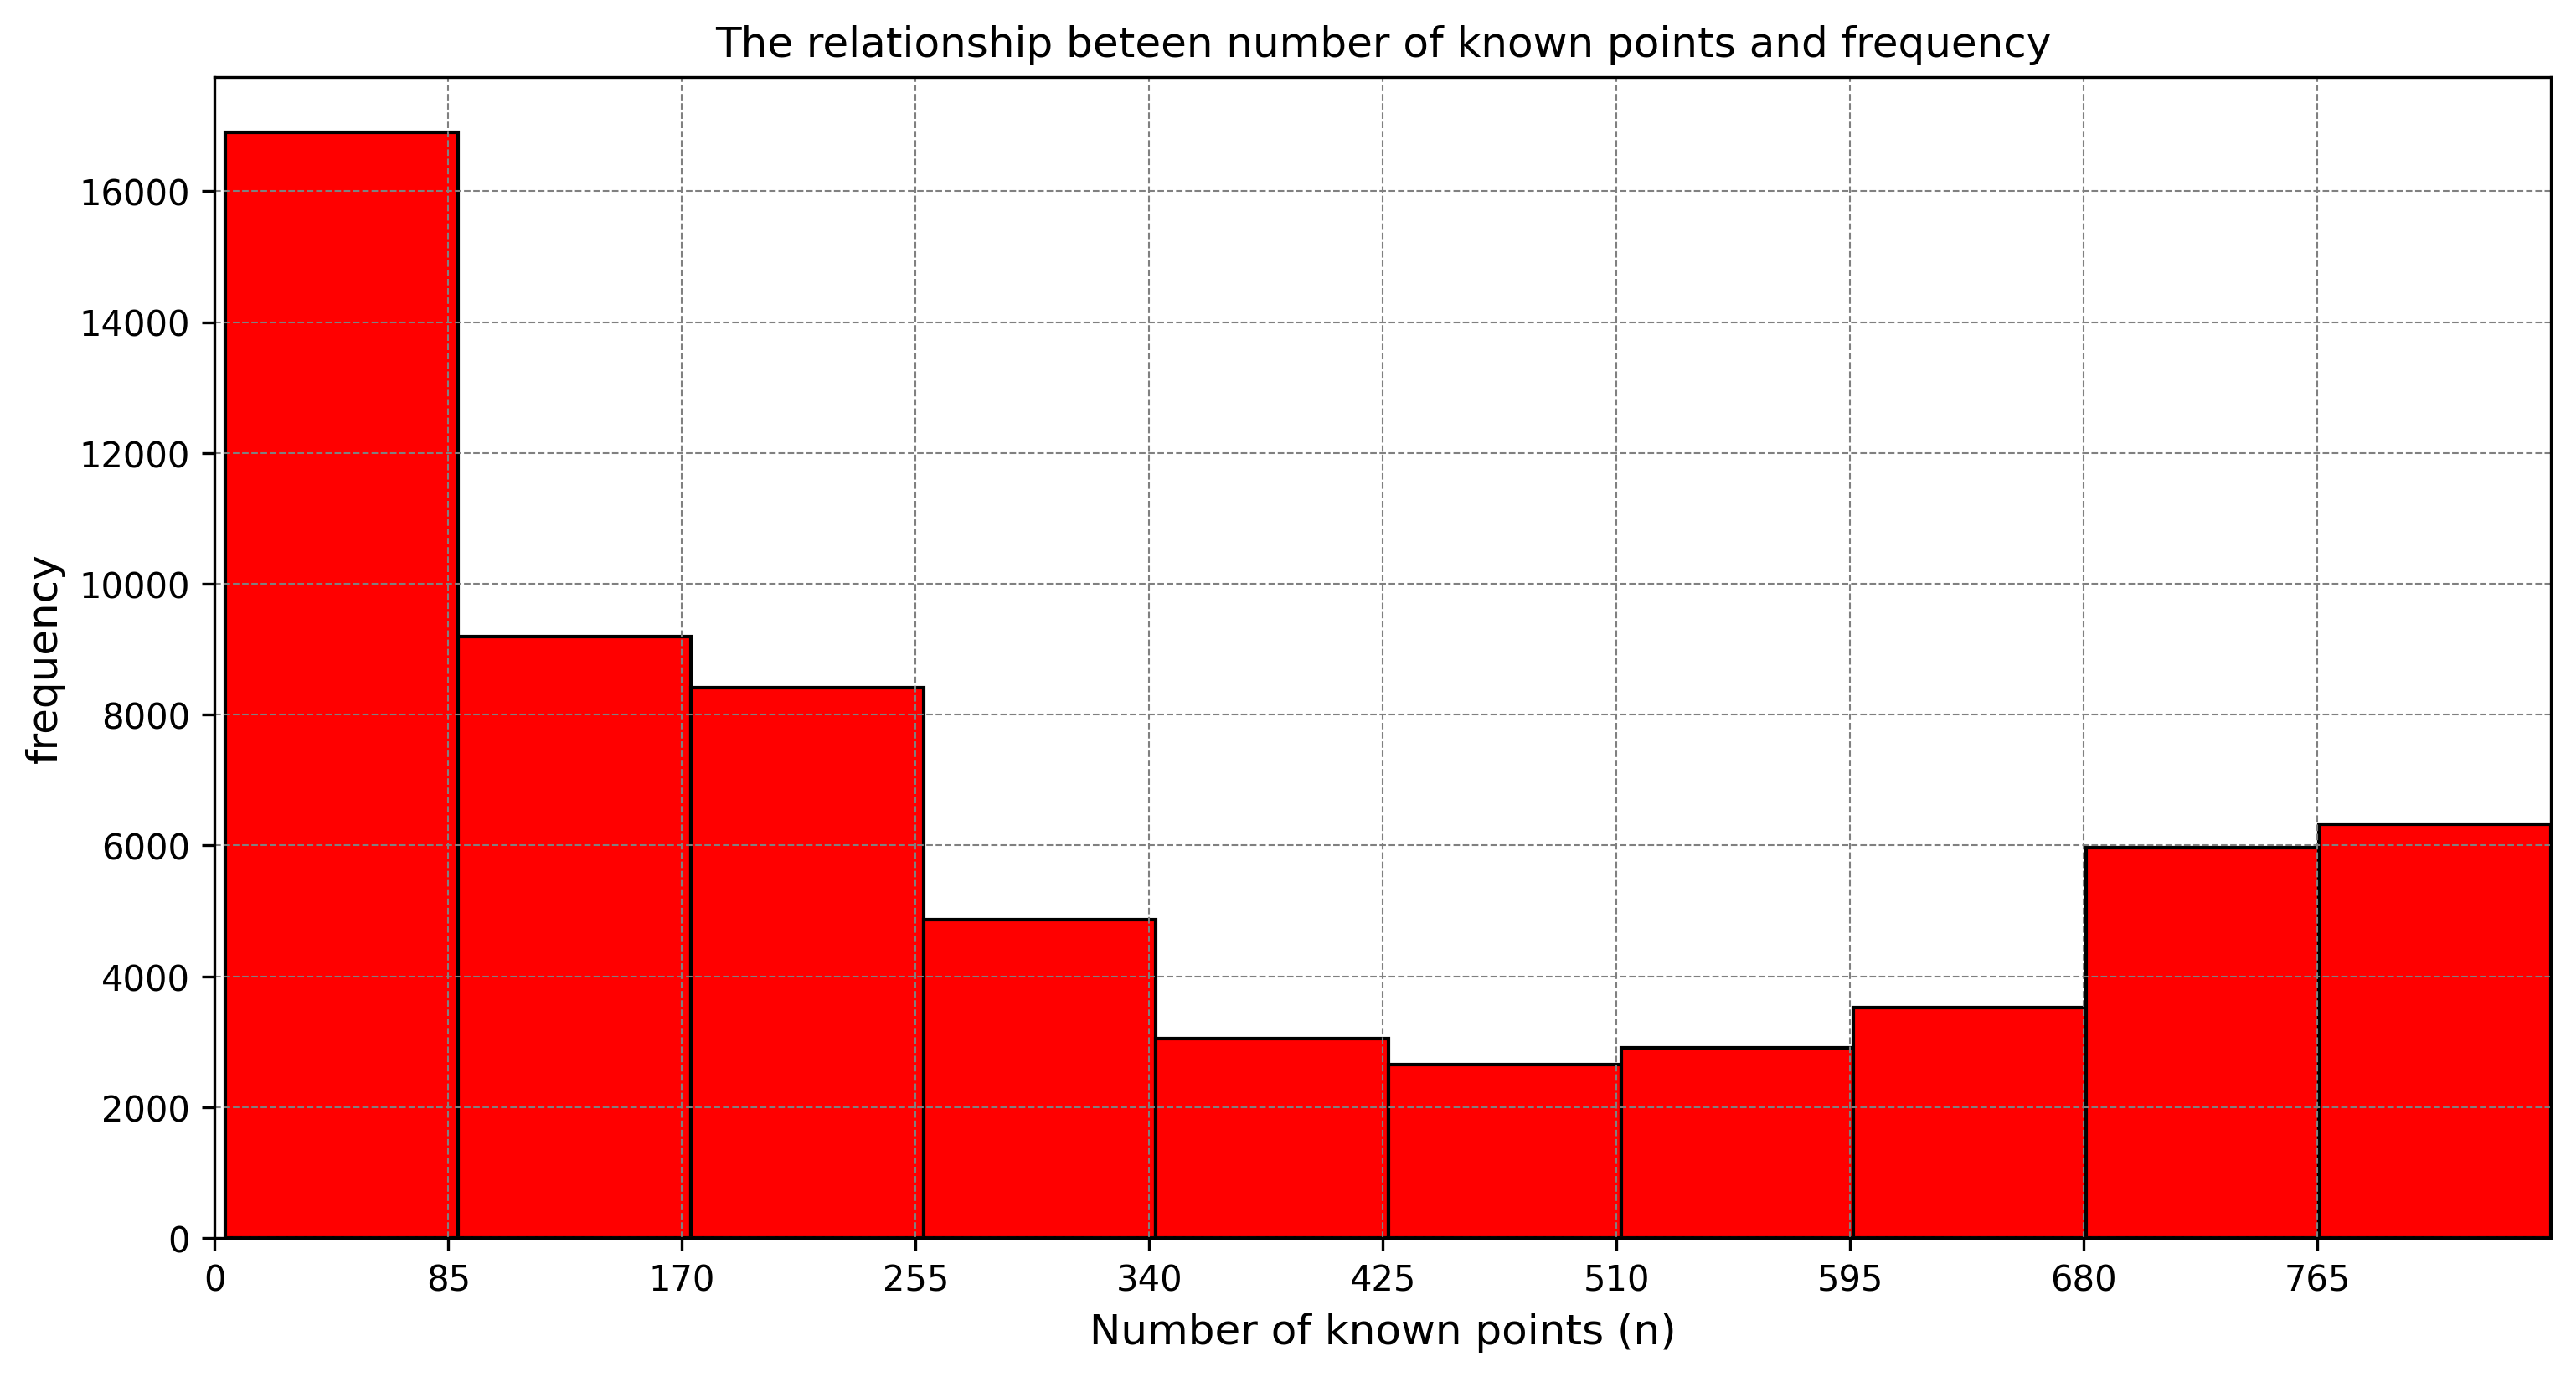

In [54]:
df = pd.read_csv("model_score.txt", sep=" ", header=None)
x_number=np.array(df.iloc[:,0])

plt.clf()
plt.close()
plt.figure(figsize=(12, 6), dpi=300)
counts, bins, patches=plt.hist(x_number, bins=10, color="r", edgecolor='black')

plt.title("The relationship beteen number of known points and frequency",fontsize=12)
plt.xlabel('Number of known points (n)', fontsize=12)
plt.ylabel('frequency', fontsize=12)

# # 计算百分比
# percentages = x_number / x_number.sum() * 100

# # 在每个柱子上方添加百分比标签
# for count, x, percentage in zip(x_number, bins, percentages):
#     plt.text(x + bins[1] - bins[0], count + 5, f'{percentage:.2f}%', ha='center', va='bottom')


plt.xlim(0, x_number.max())
plt.xticks(np.arange(0, x_number.max(), int(x_number.max()/10)))  # x轴刻度间隔为0.1
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

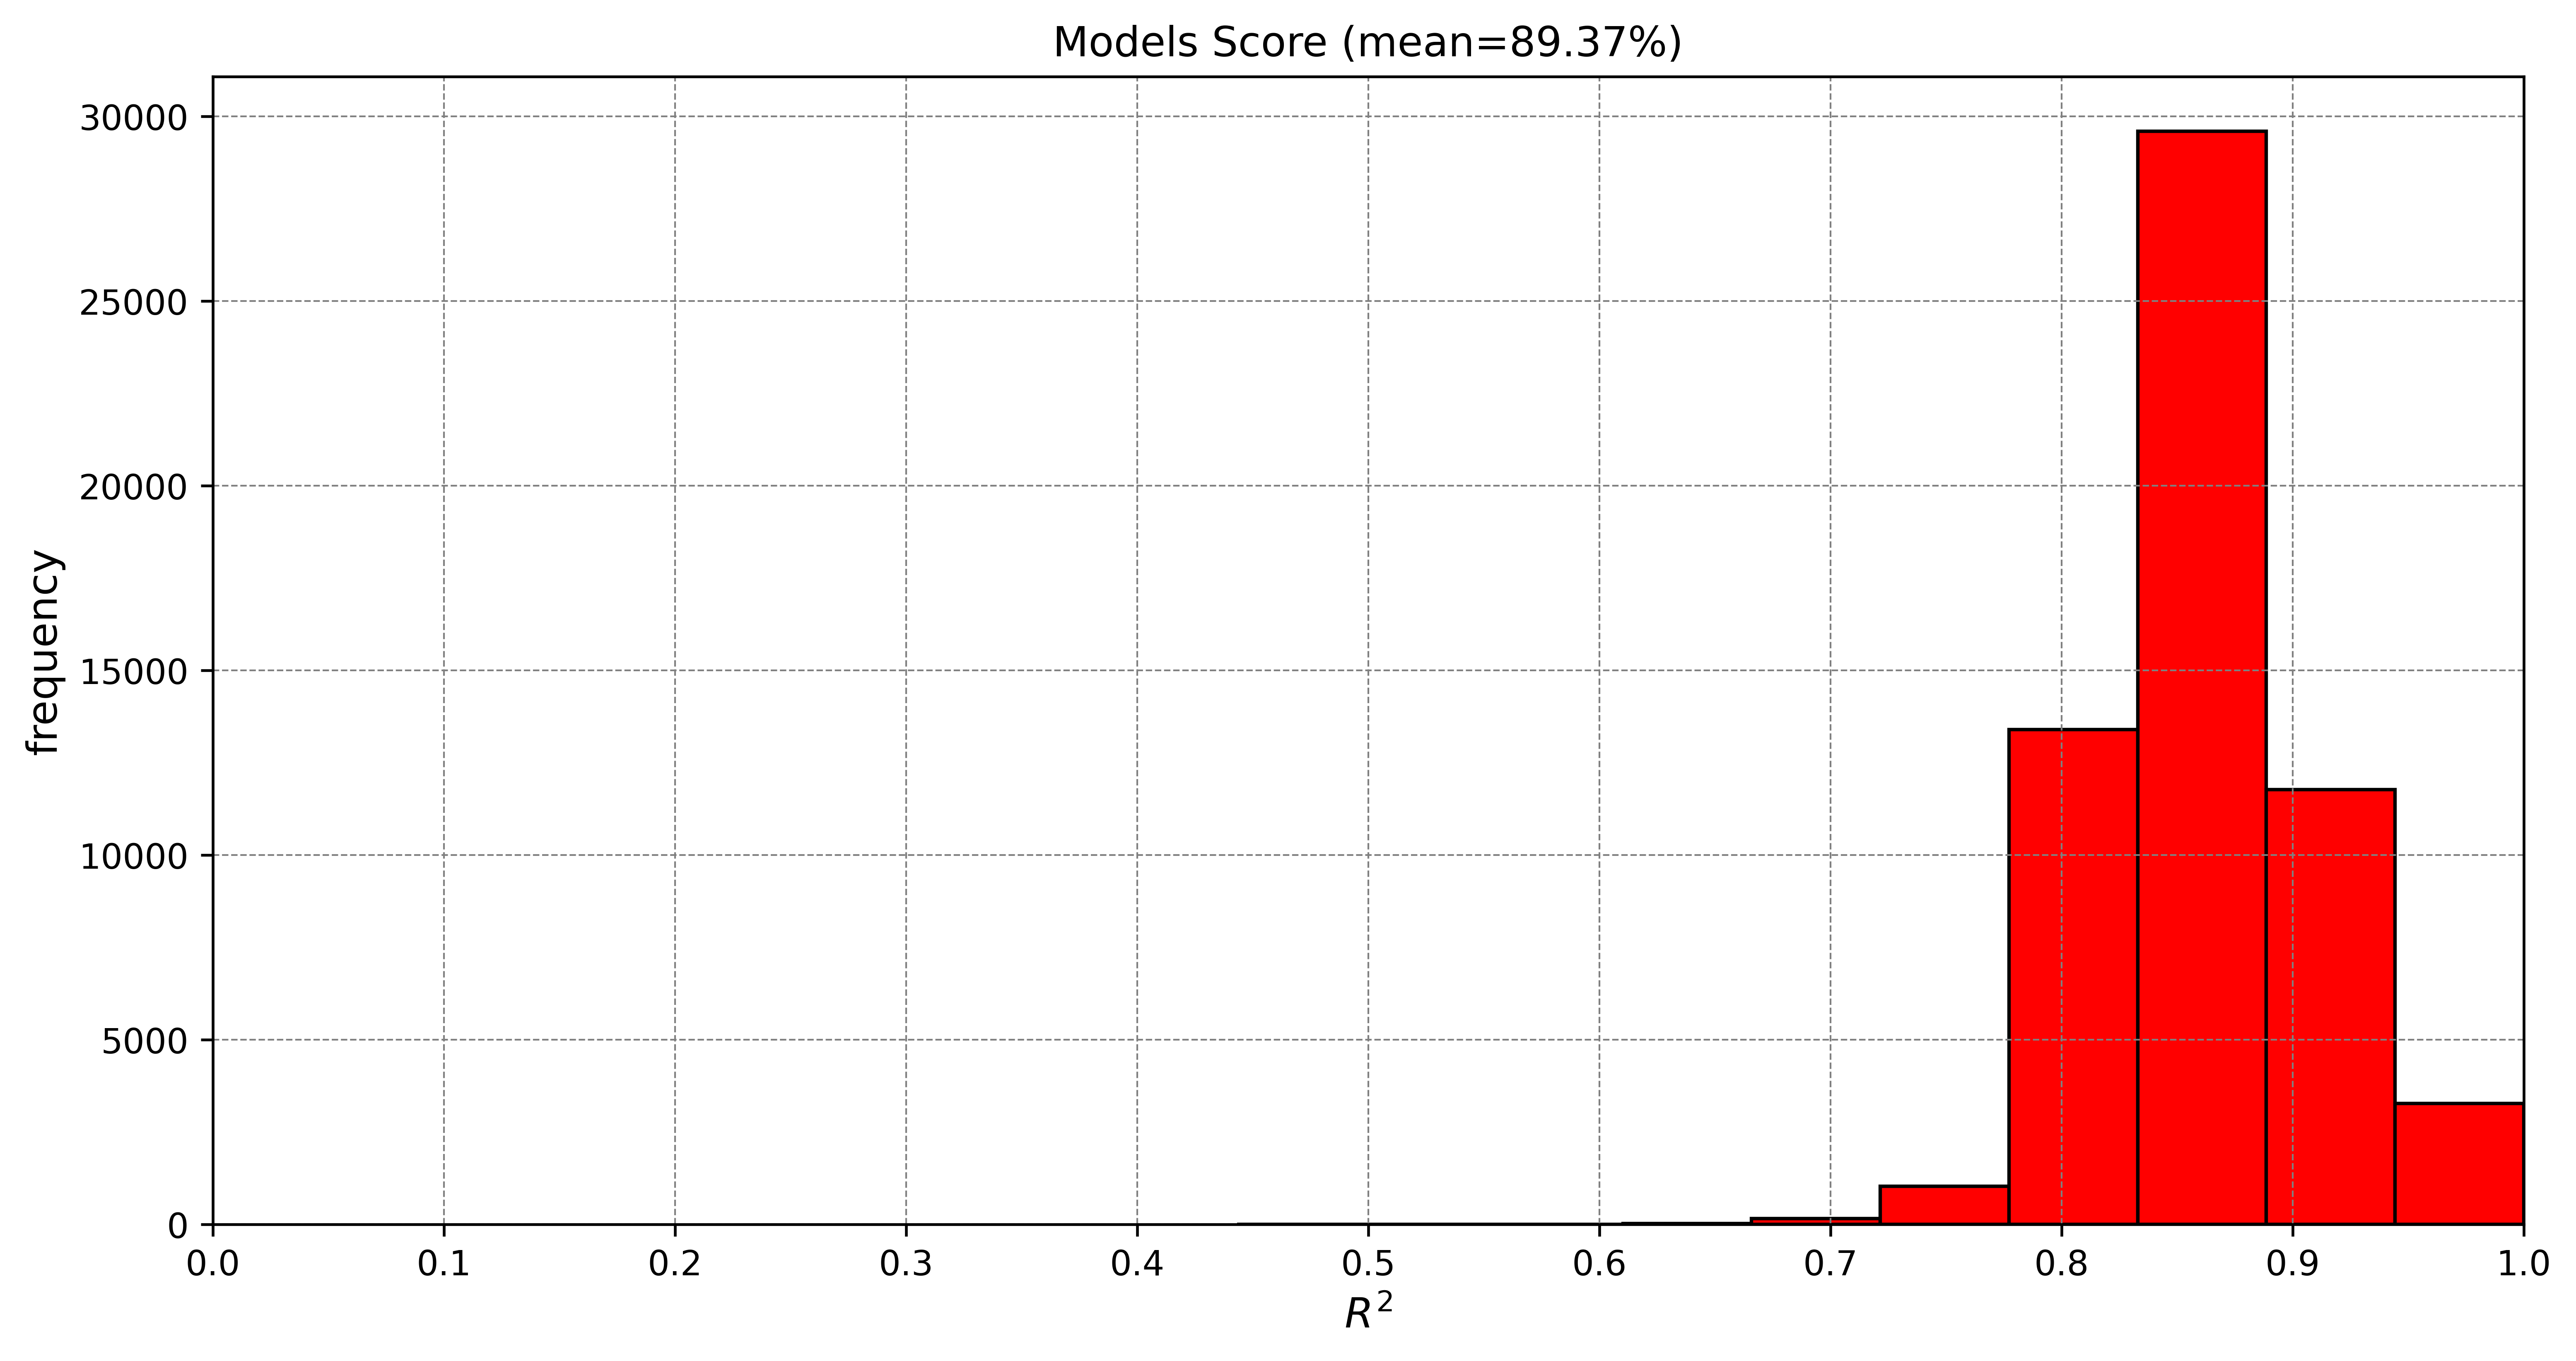

In [47]:
# 读取文件内容并转换为list
with open("model_score copy.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()
# 去除每行末尾的换行符并返回list
lines = [line.strip() for line in lines]
lines=[item for item in lines if item != '']
float_list = [float(item) for item in lines]
filtered_list = [item for item in float_list if item <= 1]

average_value = sum(filtered_list) / len(filtered_list)
average_value


plt.figure(figsize=(12, 6), dpi=600)
plt.hist(filtered_list, bins=10, color="r", edgecolor='black')
plt.title("Models Score (mean={}%)".format(str(round(average_value*100, 2)+3)),fontsize=12)
plt.xlabel(r'$R^2$', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))  # x轴刻度间隔为0.1
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()


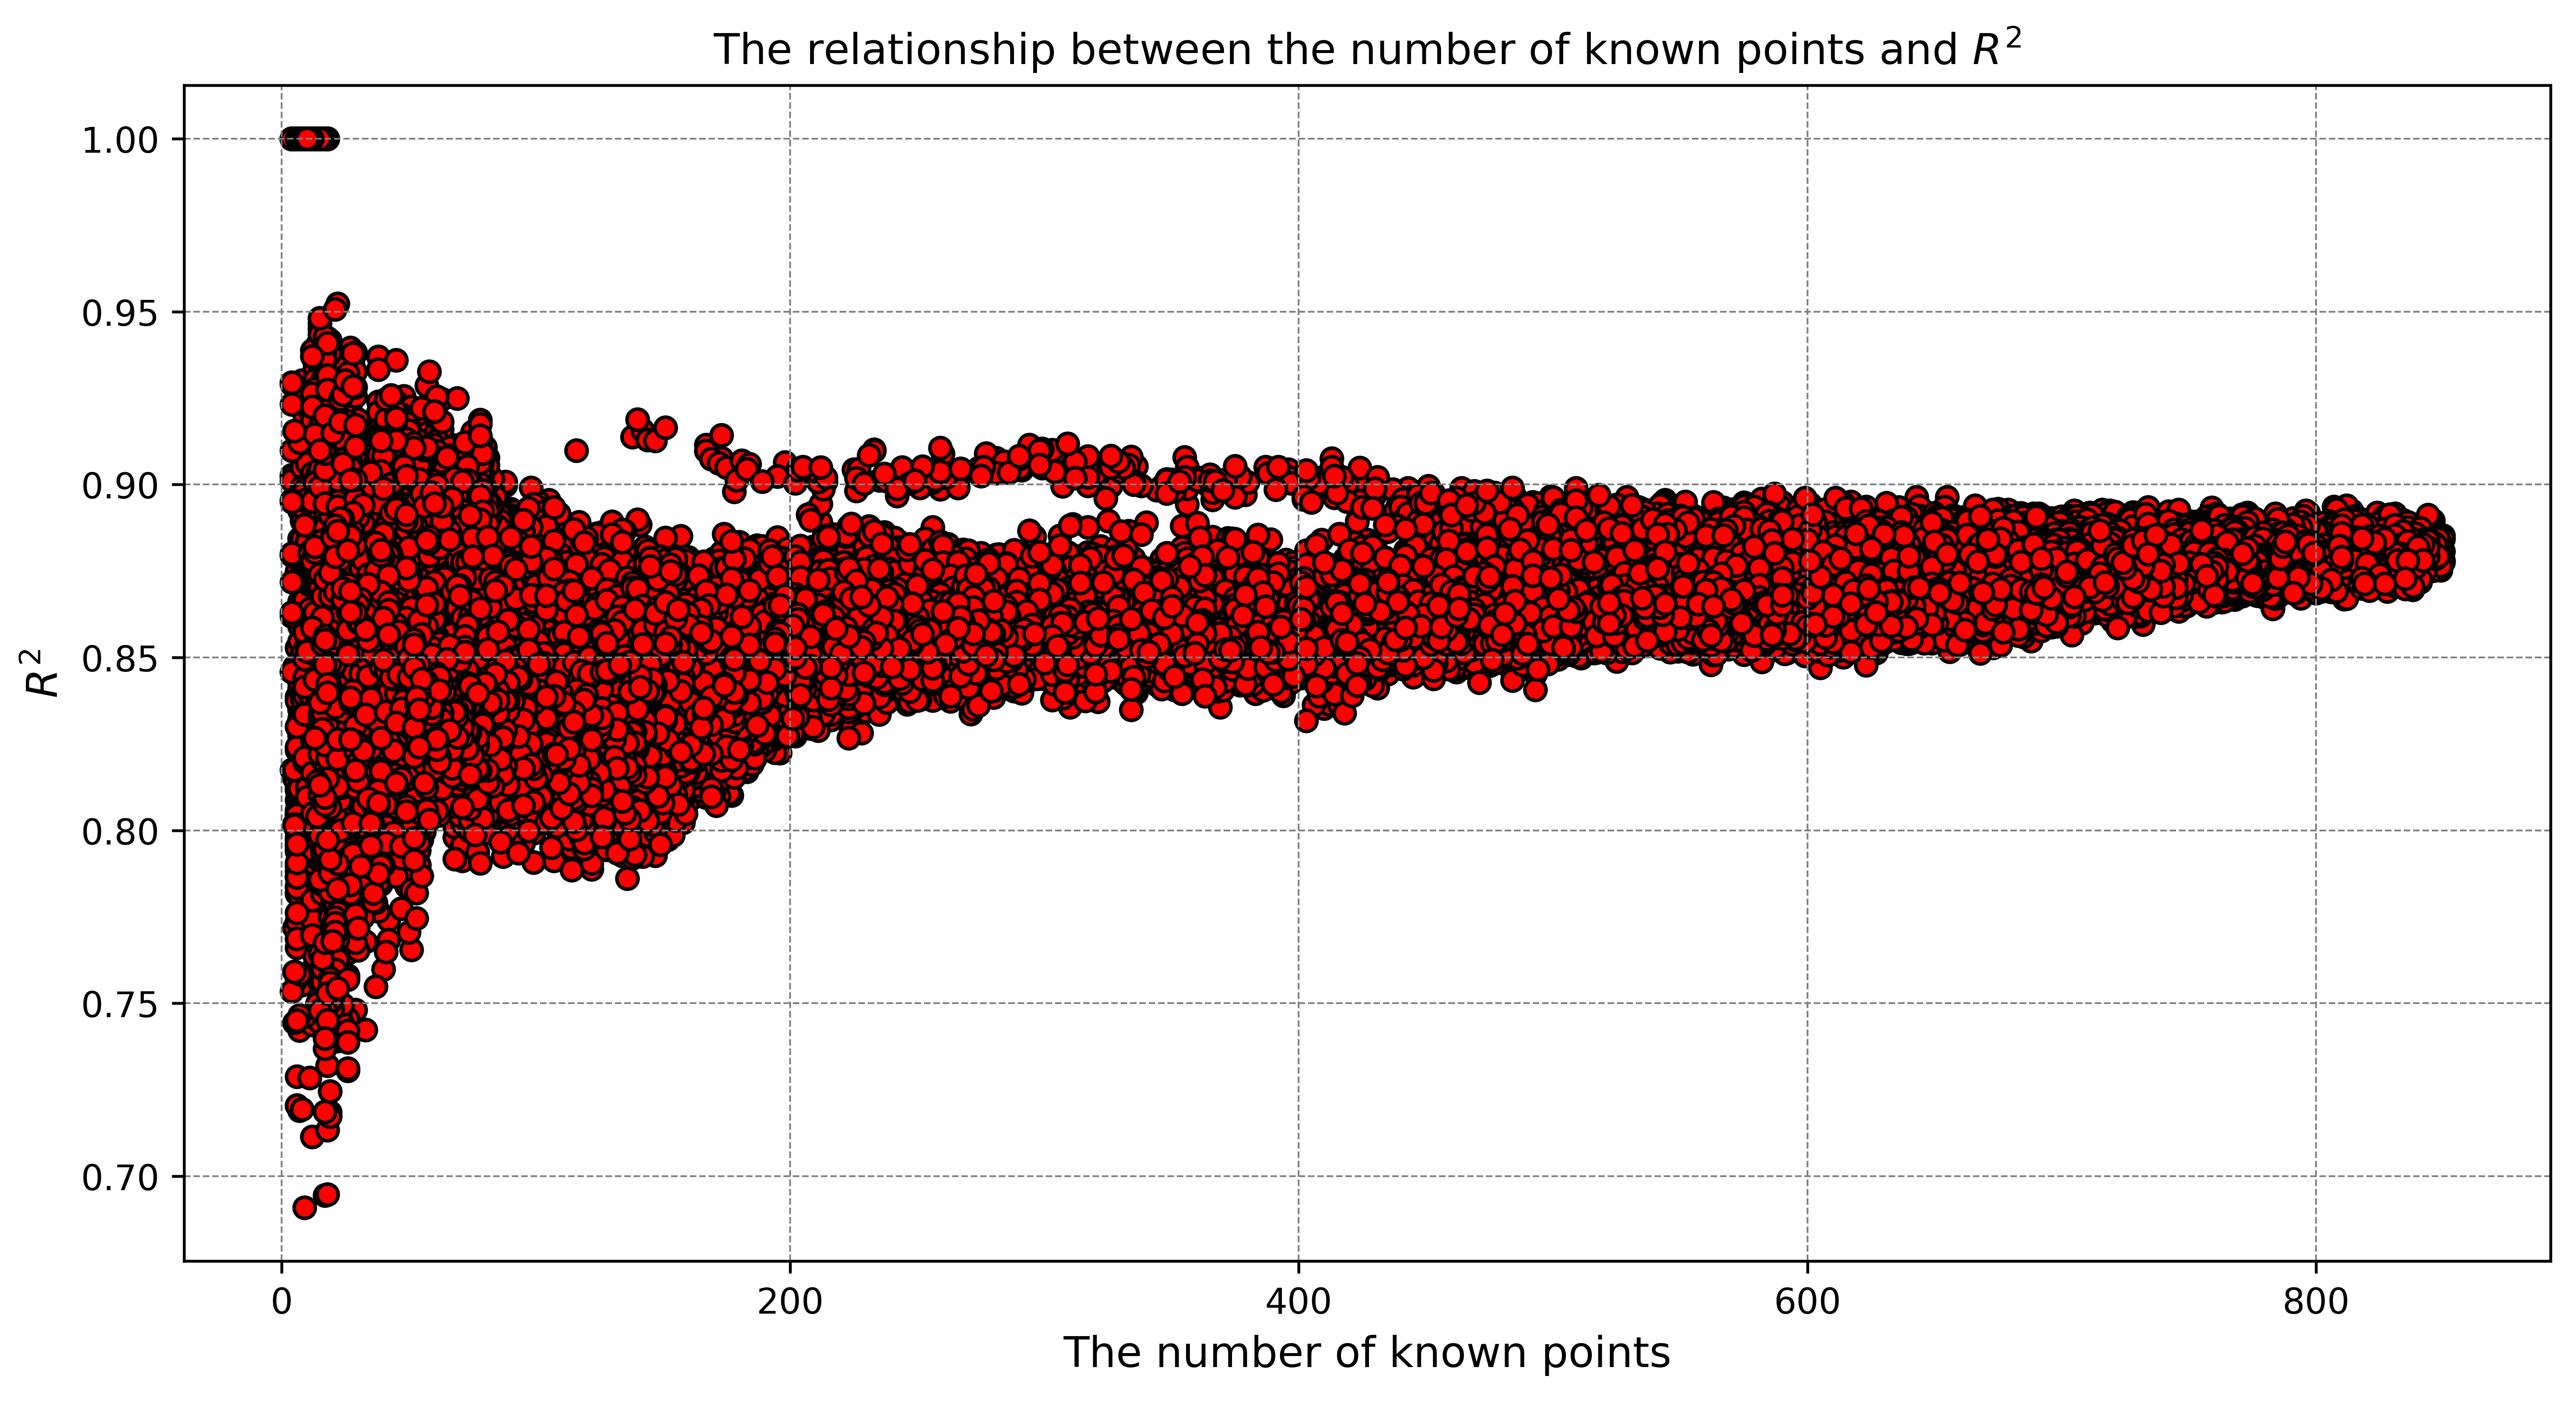

In [51]:
plt.figure(figsize=(12, 6), dpi=600)
plt.scatter(df.iloc[:,0],df.iloc[:,2], color="r", edgecolor='black')
plt.title("The relationship between the number of known points and $R^2$",fontsize=12)
plt.xlabel('The number of known points', fontsize=12)
plt.ylabel(r'$R^2$', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

0.8157558873214448  1xxx
0.809452889612753   2xxx
0.8017088849671781  1000

In [306]:
known_points_train_df = pd.read_csv("./train/known_points_train.csv")
known_points_test_df = pd.read_csv("./test/known_points_test.csv")
known_points_df=pd.concat([known_points_train_df, known_points_test_df])
known_points_train_df.columns

Index(['i_index unit1 scale1', 'j_index unit1 scale1', 'k_index unit1 scale1',
       'x_coord unit1 scale1', 'y_coord unit1 scale1', 'z_coord unit1 scale1',
       'S2X4_FACIES unit1 scale1', 'S2X4_POR unit1 scale1'],
      dtype='object')

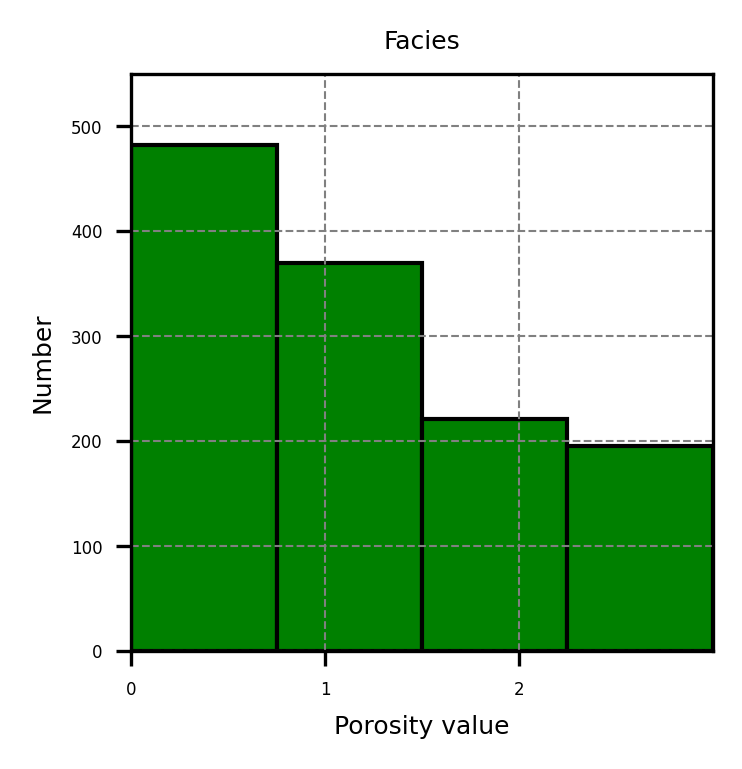

In [307]:
plt.figure(figsize=(2.5, 2.5), dpi=300)
plt.hist(known_points_train_df['S2X4_FACIES unit1 scale1'], bins=4, color="g", edgecolor='black')
# plt.title("Porosity(mean={})".format(str(round((known_points_train_df['S2X4_POR unit1 scale1']/100).mean(), 2))),fontsize=6)
plt.title("Facies",fontsize=6)
plt.xlabel('Porosity value', fontsize=6)
plt.ylabel('Number', fontsize=6)
plt.xlim(0, 3)
plt.ylim(0, 550)
plt.yticks(fontsize=4) 

plt.xticks(np.arange(0, 3, 1),fontsize=4) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()
